In [ ]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dense, SpatialDropout1D, Embedding,LSTM,Input
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

2025-12-21 23:49:52.208745: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-21 23:49:52.283665: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-21 23:49:54.066001: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
df=pd.read_csv('/home/chinghia/AI_Engineer/IMDB_Dataset/IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
X=df.drop('sentiment',axis=1)
y=df['sentiment']

In [6]:
X.shape

(50000, 1)

In [7]:
y=y.astype('category').cat.codes
y.shape

(50000,)

In [8]:
def df_clean(text):
    text=text.lower()
    text=re.sub(r'<.*?>','',text)
    text=re.sub(r'[^a-zA-Z\s]','',text)
    return text

In [9]:
X['review']=X['review'].apply(df_clean)

In [10]:
X.head(5)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...


In [11]:
X.values

array([['one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty

In [12]:
X.shape

(50000, 1)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',lower=True)
tokenizer.fit_on_texts(X_train['review'].values)
X_train=tokenizer.texts_to_sequences(X_train['review'].values)
X_train=pad_sequences(X_train,maxlen=200)

In [15]:
X_test=tokenizer.texts_to_sequences(X_test['review'].values)
X_test=pad_sequences(X_test,maxlen=200)

In [16]:
len(X_train[0])

200

In [17]:
X_train.shape

(40000, 200)

In [18]:
modelDL=Sequential([
    Input(shape=(X_train.shape[1],)),
    Embedding(10000,128),
    SpatialDropout1D(0.2),
    LSTM(100,dropout=0.2,recurrent_dropout=0.2),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

I0000 00:00:1766335807.218073   52279 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [19]:
modelDL.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 200, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        91,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,392,849 (5.31 MB)

 Trainable params: 1,392,849 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
modelDL.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [21]:
from keras.callbacks import EarlyStopping
stop=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [22]:
modelDL.fit(
    X_train,y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test,y_test),
    callbacks=stop
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 354s 561ms/step - accuracy: 0.7781 - loss: 0.4710 - val_accuracy: 0.8488 - val_loss: 0.3604
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 349s 559ms/step - accuracy: 0.8566 - loss: 0.3523 - val_accuracy: 0.8695 - val_loss: 0.3123
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 398s 550ms/step - accuracy: 0.8827 - loss: 0.2951 - val_accuracy: 0.8661 - val_loss: 0.3193
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 586ms/step - accuracy: 0.8983 - loss: 0.2561 - val_accuracy: 0.8728 - val_loss: 0.3098
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 341s 545ms/step - accuracy: 0.9190 - loss: 0.2107 - val_accuracy: 0.8833 - val_loss: 0.3047


In [25]:
modelDL.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.8833 - loss: 0.3047


[0.3047321140766144, 0.8833000063896179]

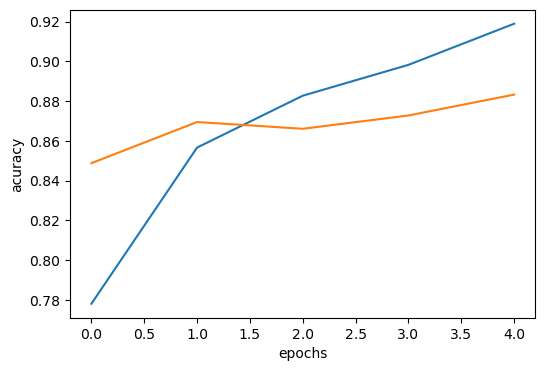

In [26]:
plt.figure(figsize=(6,4))
plt.plot(modelDL.history.history['accuracy'],label='acurary')
plt.plot(modelDL.history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('acuracy')
plt.show()